<a href="https://colab.research.google.com/github/uveysturhan/condensed-matter-related/blob/main/Kapit_Mueller_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

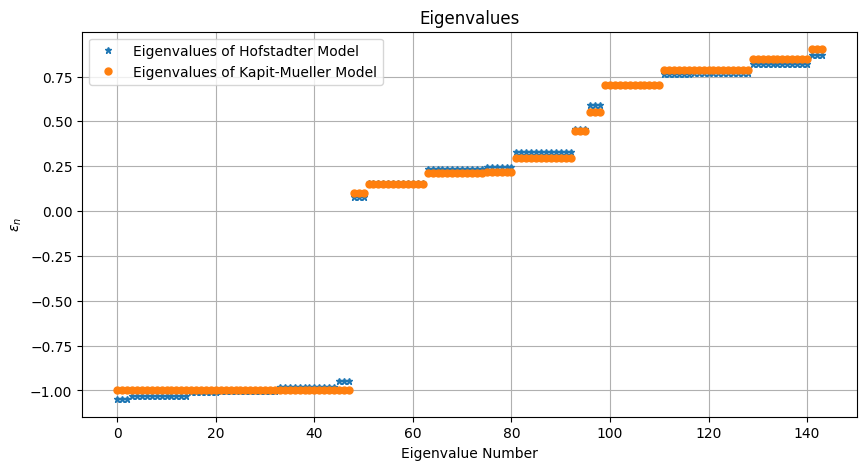

In [45]:
import numpy as np
import matplotlib.pyplot as plt

#define the hopping amplitude parameters, given in eqn(2).
#dx is the difference of the x-coordinates, i.e dx = x_i - x_j, for 0<=i,j<L.
def W_z(dx, dy, phi, t=1.0):
    G_z = (-1)**(dx + dy + dx * dy)
    W = t * G_z * np.exp(-(np.pi / 2) * (1 - phi) * (dx**2 + dy**2))
    return W

#define the Kapit-Mueller Hamiltonian.
def find_km_hamiltonian(L, neighbor_range, phi):
    H = np.zeros((L*L, L*L), dtype=complex)
    #We loop over all site pairs.
    for xj in range(L):
        for yj in range(L):
            j = xj * L + yj #Use site-indexing convention.

            for xk in range(L):
                for yk in range(L):
                    k = xk * L + yk

                    dx = (xk - xj) % L #impose the periodic boundary conditions by taking modulo L.
                    dy = (yk - yj) % L

                    if dx > L // 2: #Since periodic boundary conditions is imposed, the actual difference between two sites is less than L//2, that's why we subtract L.
                        dx = dx - L
                    if dy > L // 2:
                        dy = dy - L

                    if (abs(dx) <= neighbor_range and abs(dy) <= neighbor_range):
                      if (dx != 0 or dy != 0):
                        phase = np.exp(1j *  np.pi * (xk * yj - yk * xj) * phi) #to obtain J(z_j, z_k) in eqn(1), multiply by the phase factor
                        H[j, k] = W_z(dx,dy,phi) * phase

    return H

L = 12
neighbor_range = 2
phi = 1/3

# Find Kapit-Mueller Hamiltonian (nearest and next-to nearest neighbors)
H_km = find_km_hamiltonian(L, neighbor_range, phi)
# Compute eigenvalues
energies_km = np.linalg.eigvalsh(H_km)
sorted_energies_km = np.sort(energies_km)
#Compare with Hofstadter Model (nearest neighbors)
H_hof = find_km_hamiltonian(L=12,neighbor_range=1, phi=1/3)
energies_hof = np.linalg.eigvalsh(H_hof)
sorted_energies_hof = np.sort(energies_hof)
# Plot eigenvalues
plt.figure(figsize=(10, 5))
plt.plot(sorted_energies_hof, '*', markersize=5, label='Eigenvalues of Hofstadter Model')
plt.plot(sorted_energies_km, 'o', markersize=5, label='Eigenvalues of Kapit-Mueller Model')
plt.xlabel('Eigenvalue Number')
plt.ylabel('$\epsilon_n$')
plt.title('Eigenvalues')
plt.grid(True)
plt.legend()
plt.show()